<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Option 1: Analyzing Chipotle Data

_Author: Preriit Souda_

---

For Option 1, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis to understand the essentials of Chipotle's order data. These allow you to practice business analysis skills while also becoming comfortable with Python.



---

Lets start with all the imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as stats
import seaborn as sns



### Q1 Read in the file

In [3]:
#A: 

chip = pd.read_excel("data/chipotle.xlsx")

**Q2: Show the first 10 rows, last 20 rows and a sample of 9 rows**

In [62]:
#A: This code will display the last line of code. Showing all three tables (first 10 rows, last 20 and a sample of 9) will require the user to insert new cells below.

chip.sample(9)
chip.head(10)
chip.tail(20)


,order_id,quantity,item_name,choice_description,item_price
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],9.25
4603,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],9.25
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
4605,1828,1,Chips and Guacamole,NaN,4.45
4606,1828,1,Canned Soft Drink,[Coke],1.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
4609,1829,1,Canned Soft Drink,[Sprite],1.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25


**Q3: Find the no. of rows and columns**


In [60]:
#A: Number of rows = 4622; Number of columns = 5


chip.shape

(4622, 5)

**Q4: Find column names**

In [10]:
#A: The Columns are : 'order_id', 'quantity', 'item_name', 'choice_description', 'item_price'

chip.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

**Q5: Find no. of nulls & data type in each column**

In [13]:
#A: Data types for each column: order_id and quantity columns have integer data types; item_name and choice_description are string data types and item_price is a float (decimal) data type            4622 non-null   int64  
#the only column with Null values is choice_description with 1246 Null values. 

chip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


**Q6: Find average, standard deviation, min and max for numerical columns**

In [14]:
#A: Order_id: Min = 1; Max = 1834; Average (mean)= 927.25 (2dp); standard deviation = 528.89 (2dp)
#A: Quantity: Min = 1; Max = 15; Average (mean)= 1.08 (2dp); standard deviation = 0.41 (2dp)
#A: item_price: Min = 1.09 (2dp); Max = 44.25; Average (mean)= 7.46 (2dp); standard deviation = 4.25 (2dp)


chip.describe()


,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


**Q7- Find the item with highest quantity in any order**

In [21]:
#A: The iteam with the highest quantity in a single order is 'Chips and fresh Tomato Salsa' with 15 units ordered.

chip['quantity'].max()

chip[chip['quantity'] == 15]


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


### Q8: Calculate the average item_price 

In [23]:
#A: The average (mean) item price is 7.46 (2dp)

avg_price = chip['item_price'].mean()

round(avg_price, 2)

7.46

**Q9: Plot a histogram for item_price**

Text(0, 0.5, 'Frequency')

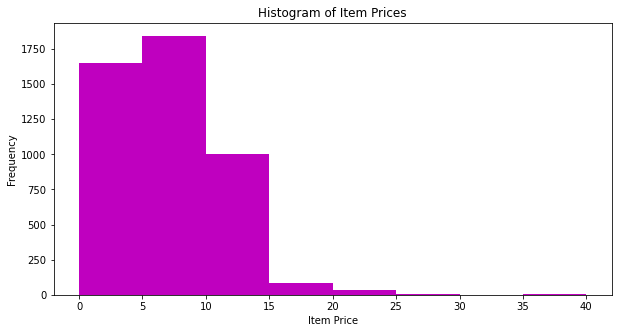

In [230]:
#A: Histogram plotted below. The x axis intervals was set at 5 for readability, colour changed to magenta, labels added for the axes and title.

plt.figure(figsize=(10,5))
plt.hist(chip['item_price'], bins=[0,5,10,15,20,25,30,35,40], color = 'm')
plt.title("Histogram of Item Prices");
plt.xlabel("Item Price")
plt.ylabel("Frequency")



**Q10- Is the above distribution normal?**

In [114]:
#A: From the histogram, we see evidence that item price in the chipotle data is not normally distributed around the mean. 
# I then ran a skewness test using the Scripy module to validate the hypothesis that the data is positively skewed.
# The test returns results between 1 and -1. If data is normally distributed, the skew test should return 0 which is observed when the distribution is symmetric about its mean. Results between 0 and 1 indicate positively skewed data, results between 0 and -1 indicate negatively skewed data.
# The test returns 0.688 (2dp) which supports the observation from the histogram that the results are positively skewed. 

from scipy.stats import skew
print(round(skew(chip['item_price']),3))


0.688



**Q11: Create a boxplot for Item Price and Quantity, add labels**

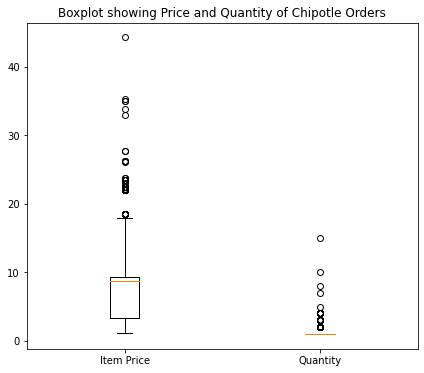

In [43]:
#A: 
plt.figure(figsize=(7,6))
plt.boxplot((chip["item_price"], chip['quantity']), labels = ("Item Price", "Quantity"))
plt.title("Boxplot showing Price and Quantity of Chipotle Orders"); 



**Q12- Find correlations between quantity & item price**

In [115]:
#A: There is a positive correlation between item price and quantity of 0.26. In other words, an increase in one is positively correlated with an increase in the other.

chip[["item_price", "quantity"]].corr()




,item_price,quantity
item_price,1.000000,0.263981
quantity,0.263981,1.000000


**Q13: Plot a heatmap for the correlation matrix above**

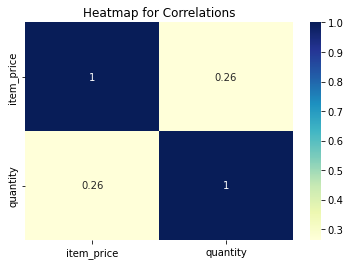

In [46]:
#A: Heatmap for the correlation matrix of quantity and price plotted below. Colour changed to the blue-green color map (which I think makes relationship scales clearer) and a title was added.


sns.heatmap(chip[["item_price", "quantity"]].corr(), annot = True, cmap="YlGnBu")
heatmap = plt.title("Heatmap for Correlations between Item and Quantity")




**Q14- Create a pairplot for Quantity and Item Price**

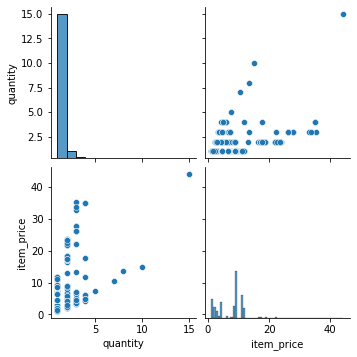

In [48]:
#A: Pairplot created with seaborn. We can see in the scatterplot the positive correlation between both variables, creating a cone like plot.

sns.pairplot(chip[["quantity", "item_price"]]);

**Q15- Calculate the average price of each ORDER**             
Hint- Use groupby

In [161]:
#A: There are 1834 unique Order_IDs in the data set which indicate 1834 customer orders. As such, to find the average price of each order (ie. the average price of items in an order), I grouped the data set by the Order_ID and used the mean average for items in the order.
# I then renamed the columns to make it clear in the new table to the user/ viewer that the table data represents the whole Order (not line items within the order) and the average item price in the order.


avg_order = chip.groupby(['order_id'])[['item_price']].mean()
renamed_avg= avg_order.rename(columns={"item_price":"Average Item Price"})


renamed_avg.index.rename('Customer Order', inplace=True)


renamed_avg


,Average Item Price
Customer Order,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


**Q16- Calculate the average order price**

In [122]:
#A: To calculate the average order price, I grouped the data by Order_ID and summed the cost of the items. I then used the mean average to find the average order value to be $18.81 (2dp).

customer_order_total = chip.groupby(['order_id'])[['item_price']].sum()
round(customer_order_total['item_price'].mean(), 2)




18.81

**Q17- Find the cost of the costliest item on the menu**                  
Make sure that the quantity is 1

In [163]:
#A: To find the cost of each individual item, I divided the item price by the quantity. This gave the costliest item on the menu as Barbacoa Salad Bowl at $11.89.


chip_cost = chip['item_price']/chip['quantity']

chip['unit cost']= chip_cost

chip.sort_values(by='unit cost', ascending = False)

,order_id,quantity,item_name,choice_description,item_price,cost,unit cost
2442,970,1,Barbacoa Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.89,11.89,11.89
2957,1176,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Cheese, Gua...",11.89,11.89,11.89
613,253,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",23.78,11.89,11.89
2401,953,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Guaca...",11.89,11.89,11.89
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,11.89,11.89
...,...,...,...,...,...,...,...
378,164,1,Canned Soda,[Mountain Dew],1.09,1.09,1.09
1805,730,1,Canned Soda,[Sprite],1.09,1.09,1.09
2520,1001,1,Canned Soda,[Coca Cola],1.09,1.09,1.09
2981,1186,1,Bottled Water,NaN,1.09,1.09,1.09


**Q18- Find the items with the above derived costliest cost**

In [231]:
#A: I filtered to display the orders which ordered the costliest item ('barabacoa salad bowl'). I assigned the filtered results to a new view and summed the quantities to find that this was ordered 10 times. 
chip[(chip["item_name"]=="Barbacoa Salad Bowl")]

highest_cost = chip[(chip["item_name"]=="Barbacoa Salad Bowl")]
highest_cost['quantity'].sum()






10

**Q19- Find the 10 most ordered items**          
Take basis unique individual orders. i.e. ignore the quantities in the quantity column

In [192]:
#A: The most ordered items by frequency (ie. excluding quantity) are Chicken Bowl (726), Chicken Burrito (553), Chips and Guacamole (479), Steak Burrito (368), Canned Soft Drink (301),  Steak Bowl (211), Chips(211),  Bottled Water (162), Chicken Soft Tacos (115) and Chips and Fresh Tomato Salsa (110). See table below.

count_item = chip['item_name'].value_counts()
count_item.head(10)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

**Q20- Find the frequency of each of the flavors chosen when Izze is purchased**

In [155]:
#A: I assigned a new view to the filtered data table by Izze and counted frequency of choice description within it. This gave Clementine (occured 8 times), Blackberry(occured 8 times) and  Grapefruit (occured 4 times)

Izze_df = chip[(chip["item_name"]=="Izze")]

Izze_df['choice_description'].value_counts()

[Clementine]    8
[Blackberry]    8
[Grapefruit]    4
Name: choice_description, dtype: int64

---

### Q21: Craft a problem statement about this data that interests you, and then answer it!


In [199]:
#Q How price sensitive are customers?

# finding the mean unit cost per item on the menu and sorting by the most expensive (ie in descending order)
cost_item = chip[['item_name', 'unit cost']].groupby('item_name').mean().sort_values(by = 'unit cost', ascending = False)
cost_item

,unit cost
item_name,
Carnitas Salad Bowl,11.056667
Steak Salad Bowl,11.027931
Barbacoa Salad Bowl,10.640000
Carnitas Bowl,10.315588
Steak Bowl,10.232559
Barbacoa Bowl,10.187273
Veggie Salad Bowl,10.138889
Barbacoa Crispy Tacos,10.087273
Barbacoa Soft Tacos,10.018400


In [196]:
#average unit cost

cost_item.mean()

unit cost    7.190439
dtype: float64

In [201]:
#Joining the Count Item table from the previous question which asks how many times items were ordered in a customer order (not quantity across customer orders)
cost_sensitive = pd.concat([cost_item, count_item], axis = 1, join="inner")

cost_renamed = cost_sensitive.rename(columns={"item_name":"Order_Count"})

cost_renamed

,unit cost,Order_Count
Carnitas Salad Bowl,11.056667,6
Steak Salad Bowl,11.027931,29
Barbacoa Salad Bowl,10.640000,10
Carnitas Bowl,10.315588,68
Steak Bowl,10.232559,211
Barbacoa Bowl,10.187273,66
Veggie Salad Bowl,10.138889,18
Barbacoa Crispy Tacos,10.087273,11
Barbacoa Soft Tacos,10.018400,25
Veggie Bowl,10.011882,85


In [206]:
#calculating the total quantity of an item that has been ordered at Chipotle

item_frequency = chip[['item_name', 'quantity']].groupby('item_name').sum().sort_values(by = 'quantity', ascending= False)
item_frequency


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [229]:
# Analysing the standard deviation of item quantity at Chipotle by item namne

round(item_frequency['quantity'].std(), 2)

159.31

In [225]:
# Correlation between frequency of item in an order and the quantity ordered. 

total_frequency = pd.concat([item_frequency, count_item], axis = 1, join="inner")
total_frequency_renamed = total_frequency.rename(columns={"item_name":"Frequency"})

total_frequency_renamed.corr()

,quantity,Frequency
quantity,1.000000,0.998716
Frequency,0.998716,1.000000


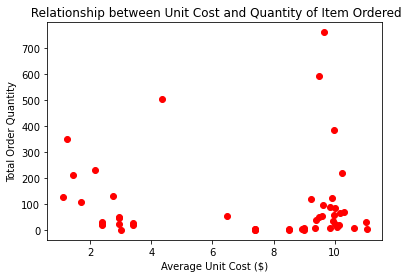

In [212]:
# Merging all three columns in a data table to be able to plot unit cost and total quantity of item ordered



cost_total_frequency = pd.concat([total_frequency, cost_renamed], axis = 1, join="inner")

#Plotting the unit cost of an item with the total times an item is ordered:

plt.scatter(cost_total_frequency['unit cost'], cost_total_frequency['quantity'], color = 'r')
plt.ylabel("Total Order Quantity")
plt.xlabel("Average Unit Cost ($)")
plt.title(" Relationship between Unit Cost and Quantity of Item Ordered");


In [217]:
#Finding the average number of different items customers order in a customer order

no_items = chip.groupby('order_id').size()
round(no_items.mean(),2)

2.52

In [222]:
#Finding the average number of total items customers order in a customer order

quantity_order = chip[['order_id', 'quantity']].groupby('order_id').sum()
quantity_order.mean()

quantity    2.711014
dtype: float64

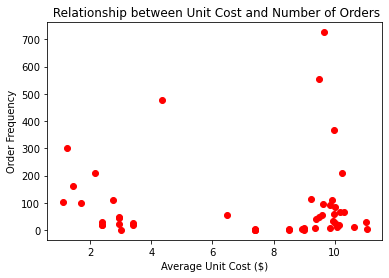

In [190]:

#Plotting a graph to visualise the relaitonship between order frequency and unit cost 
plt.scatter(cost_renamed['unit cost'], cost_renamed['Order_Count'], color = 'r')
plt.ylabel("Order Frequency")
plt.xlabel("Average Unit Cost ($)")
plt.title(" Relationship between Unit Cost and Number of Orders");

#A: Customers do not appear to be particularly price sensitive. The average unit cost is clustered around $1.5-4 and $8-11. The most frequently ordered item is in the $10 category (the Chicken Bowl). There is no clear relationship between unit price and order frequency even within these clusters which indicate that customers are not particularly price sensitive within the average item cost of the menu.
#A: See below for more insights on the data and conclusions 

### Q22- Basis your analysis above, can you write a small note. Note needs to contain top 5 insights you gathered from the analysis and 3 recommendations for Chipotle's management. 

In [20]:
#A: 

#1 insight: Customers tend to order multiple unique items per order. The average number of different items in an order is 2.52.
#2 insight: Whilst customers order multiple unique items per order, customers tend to order one of each. This is shown by the fact that the average total quantity of items ordered is 2.71 which is very close to the number of unique items ordered per customer order (2.52) and there is a very correlation between quantity and frequency of items ordered (0.99). 
#3 insight: Prices are clustered around two price points: 'lower value items' = $1.5-4.5 and 'higher value items' = $8.5-11. This indicates the menu is split between higher order value items and lower order value items.
#4 insight: In the data, customers do not appear to be price sensitive. There is no clear relationship betwween average unit cost and the frequency or quantity with which customers order the item as shown visually by the scatterplots. Even within the two pricing clusters, the most ordered item in the data is in the 'higher value' bracket and costs ~$9.5 (Chicken Bowl). This suggests customers buy mostly according to preference as opposed to price. 
#5 insight: There is a large discrepancy between the frequency of items ordered  at Chipotle. Some items were only ordered once in total, others were ordered over 500 times (chicken bowl, chicken burrito, chips and guacamole). The standard deviation of 159.31 order quantities reflects this large variation in the amount items on the menu are ordered. 


#1 recommendation: Most customers buy 1 of each item suggesting they just buy for themselves. Sales could be boosted if more customers ordered for multiple people. I would recommend trialling group promotions to boost the amount of each item customers order in a single order. 
#2 recommendation: Management should look to consolidate the menu and remove unpopular items. There is a large discrepancy between the quantity of items being ordered by customers. Some items are ordered a lot, such as the Chicken bowl was ordered 761 times. However, 'Chips and Mild Fresh Tomato Salsa', 'Carnitas Salad' and 'Veggie Crispy Tacos' were ordered only once. Significant financial savings could be made if less items were on the menu as this could save time needed to train staff on these additional menu items and wasted ingredients that are not used. 
#2 recommendation: For the hightest ordered items, consider increasing prices slightly to boost profitabilty. The data doesn't reveal a strong relationship between the average unit cost and the item's popularity. Whilst remaining within the price buckets aforementioned, management should consider increasing prices of the 10 most popular items closer to the higher range of the 'higher value' and 'lower value' item price brackets.